In [1]:
import pyteomics
import lxml
from pyteomics import mzml, mass
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
from matplotlib import pyplot
import matplotlib
import seaborn as sns
import re
import math

In [2]:
# plot a violin figure for all NPs and neat plasma

In [3]:
sample=[2,4,6,8,3]

def remove_dul(tar_list=sample):
    res=[]
    [res.append(x) for x in tar_list if x not in res]
    return(res)

def average(sample):
    return sum(sample) / len(sample)

def procount(dir='E:\\yuming\\2023\\20230118\\csodiaq\\DD'):
    plasma_pro = []
    for file in os.listdir(dir):
        if file.endswith(".csv") and 'proteinFDR' in file:
            plasma_pro.append(os.path.join(dir, file))
    dic={}
    for i in range(len(plasma_pro)):
        df=pd.read_csv(plasma_pro[i]) 
        yummy=len(remove_dul(tar_list=df['protein'].tolist()))
        dic[str(plasma_pro[i].split('\\')[-1])]=yummy
        dfnew=pd.DataFrame.from_dict(dic, orient='index')
    return(dfnew)
def pepcount(dir='E:\\yuming\\2023\\20230118\\csodiaq\\DD'):
    plasma_pro = []
    for file in os.listdir(dir):
        if file.endswith(".csv") and 'proteinFDR' in file:
            plasma_pro.append(os.path.join(dir, file))
    dic={}
    for i in range(len(plasma_pro)):
        df=pd.read_csv(plasma_pro[i]) 
        yummy=len(remove_dul(tar_list=df['peptide'].tolist()))
        dic[str(plasma_pro[i].split('\\')[-1])]=yummy
        dfnew=pd.DataFrame.from_dict(dic, orient='index')
    return(dfnew)

def plasma_file(dir = "E:\\yuming\\2023\\20230130\\NP4\\csodiaq"):
    ['''take the common_peptides and common_protein files out''']
    plasma_pro = []
    plasma_pep = []
    for file in os.listdir(dir):
        if 'common_proteins' in file:
            plasma_pro.append(os.path.join(dir, file))
        if 'common_peptides' in file:
            plasma_pep.append(os.path.join(dir, file))
    dfpep=pd.read_csv(plasma_pep[0])
    dfpro=pd.read_csv(plasma_pro[0])
    dfpep.set_index('Unnamed: 0',inplace=True)
    dfpro.set_index('Unnamed: 0',inplace=True)
    toge=[dfpep,dfpro]
    return(toge)

In [4]:
plasma_file(dir = "E:\\yuming\\2023\\20230130\\NP5\\csodiaq")[1]    

,:/yuming/2023/20230130/NP5/NP5_1.mzXML,:/yuming/2023/20230130/NP5/NP5_1_2.mzXML,:/yuming/2023/20230130/NP5/NP5_1_3.mzXML,:/yuming/2023/20230130/NP5/NP5_2.mzXML,:/yuming/2023/20230130/NP5/NP5_2_2.mzXML,:/yuming/2023/20230130/NP5/NP5_2_3.mzXML,:/yuming/2023/20230130/NP5/NP5_4.mzXML,:/yuming/2023/20230130/NP5/NP5_4_2.mzXML,:/yuming/2023/20230130/NP5/NP5_4_3.mzXML,:/yuming/2023/20230130/NP5/NP5_8.mzXML,:/yuming/2023/20230130/NP5/NP5_8_2.mzXML,:/yuming/2023/20230130/NP5/NP5_8_3.mzXML,mean,std
Unnamed: 0,,,,,,,,,,,,,,
1/sp|P07996|TSP1_HUMAN,6.577122e+05,6.777742e+05,7.712292e+05,4.782945e+05,5.477050e+05,5.411782e+05,3.594271e+05,4.115850e+05,3.965409e+05,2.910113e+05,3.424224e+05,3.671201e+05,4.868333e+05,1.405621e+05
1/sp|P01009|A1AT_HUMAN,4.224076e+04,5.671643e+04,5.834581e+04,3.112723e+04,4.345459e+04,3.735028e+04,2.675294e+04,3.563706e+04,3.695109e+04,2.505934e+04,3.311948e+04,2.972761e+04,3.804022e+04,9.815701e+03
1/sp|P01024|CO3_HUMAN,1.433452e+07,1.972528e+07,1.975148e+07,1.235812e+07,1.354076e+07,1.269695e+07,8.211946e+06,1.083647e+07,1.072281e+07,7.053975e+06,9.039905e+06,8.151714e+06,1.220199e+07,3.853896e+06
1/sp|P02748|CO9_HUMAN,4.137450e+05,7.560139e+05,6.705685e+05,3.416708e+05,4.112005e+05,3.960635e+05,2.775501e+05,3.500784e+05,3.498362e+05,2.064181e+05,3.041431e+05,2.575107e+05,3.945666e+05,1.494347e+05
1/sp|P00740|FA9_HUMAN,1.172770e+06,1.424367e+06,1.524766e+06,9.139609e+05,1.032521e+06,1.131908e+06,5.811834e+05,8.560944e+05,8.981595e+05,6.088799e+05,6.049120e+05,6.368473e+05,9.488641e+05,2.944662e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4/sp|P01861|IGHG4_HUMAN/sp|P01860|IGHG3_HUMAN/sp|P01859|IGHG2_HUMAN/sp|P01857|IGHG1_HUMAN,3.601538e+05,4.491461e+05,4.360056e+05,3.293877e+05,3.664267e+05,2.834815e+05,2.799557e+05,2.604056e+05,2.555482e+05,2.013425e+05,2.547814e+05,2.272657e+05,3.086584e+05,7.339236e+04
6/sp|P68133|ACTS_HUMAN/sp|P68032|ACTC_HUMAN/sp|P63267|ACTH_HUMAN/sp|P63261|ACTG_HUMAN/sp|P62736|ACTA_HUMAN/sp|P60709|ACTB_HUMAN,7.385775e+04,1.173913e+05,1.115347e+05,5.853076e+04,6.222415e+04,5.951017e+04,4.051924e+04,5.671108e+04,5.244594e+04,3.454151e+04,4.909948e+04,3.824404e+04,6.288418e+04,2.439548e+04
1/sp|P07360|CO8G_HUMAN,2.208832e+05,3.491375e+05,2.989813e+05,1.741602e+05,1.167830e+05,1.474293e+05,7.222542e+04,2.401670e+05,1.584183e+05,7.346894e+04,1.140884e+05,1.124491e+05,1.731826e+05,8.082584e+04


In [5]:
i = 0    # i=1 extracts protein file, i=0 extracts peptide file

dfpro_np5=plasma_file(dir = "E:\\yuming\\2023\\20230130\\NP5\\csodiaq")[i]
dfpro_np4=plasma_file(dir = "E:\\yuming\\2023\\20230130\\NP4\\csodiaq")[i]
dfpro_np3=plasma_file(dir = "E:\\yuming\\2023\\20230129\\NP3\\New folder\\csodiaq2")[i]
dfpro_np2=plasma_file(dir = "E:\\yuming\\2023\\20230129\\NP2\\csodiaq")[i]
dfpro_np1=plasma_file(dir = "E:\\yuming\\2023\\20230129\\NP1\\csodiaq")[i]
dfpro_dd=plasma_file(dir = "E:\\yuming\\2023\\20230118\\csodiaq\\DD")[i]

In [6]:
dfpro_np5

,:/yuming/2023/20230130/NP5/NP5_1.mzXML,:/yuming/2023/20230130/NP5/NP5_1_2.mzXML,:/yuming/2023/20230130/NP5/NP5_1_3.mzXML,:/yuming/2023/20230130/NP5/NP5_2.mzXML,:/yuming/2023/20230130/NP5/NP5_2_2.mzXML,:/yuming/2023/20230130/NP5/NP5_2_3.mzXML,:/yuming/2023/20230130/NP5/NP5_4.mzXML,:/yuming/2023/20230130/NP5/NP5_4_2.mzXML,:/yuming/2023/20230130/NP5/NP5_4_3.mzXML,:/yuming/2023/20230130/NP5/NP5_8.mzXML,:/yuming/2023/20230130/NP5/NP5_8_2.mzXML,:/yuming/2023/20230130/NP5/NP5_8_3.mzXML,mean,std
Unnamed: 0,,,,,,,,,,,,,,
YEASILTHDSSIR,816456.906982,1.320958e+06,1.037493e+06,1.027229e+06,1.034081e+06,1.138085e+06,528861.912964,607460.447144,633821.842163,349466.169495,522087.455811,456085.537354,789340.611465,288781.556521
ADIGC(UniMod:4)TPGSGK,537348.542725,7.400476e+05,7.642392e+05,3.287490e+05,3.478570e+05,2.842050e+05,253217.874939,346452.012207,309784.737610,227332.966644,253609.408020,252852.432220,387141.307638,173612.031237
IYGNQDTSSQLK,59865.467773,7.383565e+04,7.082629e+04,4.073099e+04,4.051309e+04,4.070340e+04,29575.768097,35275.027710,36735.155212,26911.881866,34665.412537,29838.722839,43289.737872,14691.257136
ESLSSYWESAK,230674.392456,2.597801e+05,2.600698e+05,2.096138e+05,1.041825e+05,2.246872e+05,142097.949036,159342.050659,153510.632965,84764.099854,139354.843750,131467.386108,174962.069150,54985.247411
VETEDQVLATFC(UniMod:4)GR,132640.046326,2.068365e+05,1.892121e+05,1.244769e+05,1.527028e+05,1.384859e+05,79394.635376,113396.914673,113449.283813,66497.852295,85650.931213,71597.642914,122861.799121,41085.344930
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
HTSLGPLEAK,51038.747620,4.597523e+04,4.854060e+04,2.755299e+04,3.430807e+04,3.093331e+04,17944.095734,23601.634705,25998.637695,15134.143677,23710.923279,14223.601654,29913.498683,11696.992051
GLAGAVSELLR,31596.392761,3.285055e+04,3.071249e+04,1.477119e+04,9.815042e+04,2.644280e+04,10367.004272,14073.633026,15509.646301,12037.205383,13913.628235,14937.141357,26280.175201,22173.414197
QGFFPDSVNK,103760.505859,1.574828e+05,1.425096e+05,7.061211e+04,8.815130e+04,8.844682e+04,46809.198181,72457.462280,64956.097839,45044.354126,42211.778687,45860.360107,80691.865758,34968.090997


In [7]:
start_index = 0
end_index = 3
pronp5 = dfpro_np5.iloc[:, start_index:end_index].T
pronp4 = dfpro_np4.iloc[:, start_index:end_index].T
pronp3 = dfpro_np3.iloc[:, start_index:end_index].T
pronp2 = dfpro_np2.iloc[:, start_index:end_index].T
pronp1 = dfpro_np1.iloc[:, start_index:end_index].T
prodd = dfpro_dd.iloc[:, start_index:end_index].T
start_index = 3
end_index = 6
pronp5_2 = dfpro_np5.iloc[:, start_index:end_index].T
pronp4_2 = dfpro_np4.iloc[:, start_index:end_index].T
pronp3_2 = dfpro_np3.iloc[:, start_index:end_index].T
pronp2_2 = dfpro_np2.iloc[:, start_index:end_index].T
pronp1_2 = dfpro_np1.iloc[:, start_index:end_index].T
prodd_2 = dfpro_dd.iloc[:, start_index:end_index].T
start_index = 6
end_index = 9
pronp5_3 = dfpro_np5.iloc[:, start_index:end_index].T
pronp4_3 = dfpro_np4.iloc[:, start_index:end_index].T
pronp3_3 = dfpro_np3.iloc[:, start_index:end_index].T
pronp2_3 = dfpro_np2.iloc[:, start_index:end_index].T
pronp1_3 = dfpro_np1.iloc[:, start_index:end_index].T
prodd_3 = dfpro_dd.iloc[:, start_index:end_index].T
start_index = 9
end_index = 12
pronp5_4 = dfpro_np5.iloc[:, start_index:end_index].T
pronp4_4 = dfpro_np4.iloc[:, start_index:end_index].T
pronp3_4 = dfpro_np3.iloc[:, start_index:end_index].T
pronp2_4 = dfpro_np2.iloc[:, start_index:end_index].T
pronp1_4 = dfpro_np1.iloc[:, start_index:end_index].T
prodd_4 = dfpro_dd.iloc[:, start_index:end_index].T

In [8]:
cv = lambda x: np.std(x, ddof=1) / np.mean(x) * 100 

In [9]:
newdf={'DD':prodd.apply(cv).tolist(),'DD_2':prodd_2 .apply(cv).tolist(),'DD_3':prodd_3 .apply(cv).tolist(),'DD_4':prodd_4.apply(cv).tolist(),
    'NP1':pronp1.apply(cv).tolist(),'NP1_2':pronp1_2 .apply(cv).tolist(),'NP1_3':pronp1_3 .apply(cv).tolist(),'NP1_4':pronp1_4.apply(cv).tolist(),
    'NP2':pronp2.apply(cv).tolist(),'NP2_2':pronp2_2 .apply(cv).tolist(),'NP2_3':pronp2_3.apply(cv).tolist(),'NP2_4':pronp2_4.apply(cv).tolist(),
    'NP3':pronp3.apply(cv).tolist(),'NP3_2':pronp3_2 .apply(cv).tolist(),'NP3_3':pronp3_3.apply(cv).tolist(),'NP3_4':pronp3_4.apply(cv).tolist(),
    'NP4':pronp4.apply(cv).tolist(),'NP4_2':pronp4_2 .apply(cv).tolist(),'NP4_3':pronp4_3.apply(cv).tolist(),'NP4_4':pronp4_4.apply(cv).tolist(),
    'NP5': pronp5.apply(cv).tolist(),'NP5_2': pronp5_2 .apply(cv).tolist(),'NP5_3': pronp5_3.apply(cv).tolist(),'NP5_4': pronp5_4.apply(cv).tolist()}



In [10]:
uk=pd.DataFrame.from_dict(newdf, orient='index')

In [11]:
um=uk.transpose()

In [12]:
um

,DD,DD_2,DD_3,DD_4,NP1,NP1_2,NP1_3,NP1_4,NP2,NP2_2,...,NP3_3,NP3_4,NP4,NP4_2,NP4_3,NP4_4,NP5,NP5_2,NP5_3,NP5_4
0,10.079153,10.057825,3.490801,16.365380,16.496102,8.130669,10.814775,10.470729,7.413371,4.006728,...,3.676452,39.825602,9.808472,14.232185,19.123448,17.447451,23.896135,5.824779,9.254073,19.682329
1,4.127725,17.594285,1.453040,12.788900,13.127940,4.776618,15.900965,19.889637,13.633761,9.646430,...,2.279134,5.329690,33.512175,14.137151,7.679684,9.132724,18.308906,10.198284,15.493795,6.114917
2,2.476276,19.948821,3.473787,9.065777,49.056561,51.412523,36.458124,57.628779,11.956407,11.309163,...,9.565845,26.869534,33.715918,12.048248,19.578098,19.373352,10.784723,0.291878,11.172069,12.849061
3,1.685487,12.812647,3.602966,5.406881,7.890498,4.192499,10.654865,9.660570,10.352472,5.449173,...,4.750166,7.684248,42.595341,4.323667,13.527300,29.807187,6.750664,36.578328,5.783900,24.893376
4,15.416709,14.492858,2.461174,2.686699,7.566362,1.438221,8.650757,8.174649,25.625776,5.008857,...,15.392636,16.771965,22.633543,12.613652,23.635270,21.577922,21.996615,10.185873,19.245990,13.299699
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
712,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,8.126625,14.828495,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
713,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,11.838486,5.419411,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
714,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.186938,11.748146,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
715,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,11.376517,10.946253,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
xlabels=['DD(0.4ug/ul)','DD(0.2ug/ul)','DD(0.1ug/ul)','DD(0.05ug/ul)',
         'NP1(0.4ug/ul)','NP1(0.2ug/ul)','NP1(0.1ug/ul)','NP1(0.05ug/ul)',
         'NP2(0.4ug/ul)','NP2(0.2ug/ul)','NP2(0.1ug/ul)','NP2(0.05ug/ul)',
         'NP3(0.4ug/ul)','NP3(0.2ug/ul)','NP3(0.1ug/ul)','NP3(0.05ug/ul)',
         'NP4(0.4ug/ul)','NP4(0.2ug/ul)','NP4(0.1ug/ul)','NP4(0.05ug/ul)',
         'NP5(0.4ug/ul)','NP5(0.2ug/ul)','NP5(0.1ug/ul)','NP5(0.05ug/ul)']

In [14]:
xlabels2=['DD(0.4)','DD(0.2)','DD(0.1)','DD(0.05)',
         'NP1(0.4)','NP1(0.2)','NP1(0.1)','NP1(0.05)',
         'NP2(0.4)','NP2(0.2)','NP2(0.1)','NP2(0.05)',
         'NP3(0.4)','NP3(0.2)','NP3(0.1)','NP3(0.05)',
         'NP4(0.4)','NP4(0.2)','NP4(0.1)','NP4(0.05)',
         'NP5(0.4)','NP5(0.2)','NP5(0.1)','NP5(0.05)']

In [15]:
um.columns=xlabels2

In [16]:
um

,DD(0.4),DD(0.2),DD(0.1),DD(0.05),NP1(0.4),NP1(0.2),NP1(0.1),NP1(0.05),NP2(0.4),NP2(0.2),...,NP3(0.1),NP3(0.05),NP4(0.4),NP4(0.2),NP4(0.1),NP4(0.05),NP5(0.4),NP5(0.2),NP5(0.1),NP5(0.05)
0,10.079153,10.057825,3.490801,16.365380,16.496102,8.130669,10.814775,10.470729,7.413371,4.006728,...,3.676452,39.825602,9.808472,14.232185,19.123448,17.447451,23.896135,5.824779,9.254073,19.682329
1,4.127725,17.594285,1.453040,12.788900,13.127940,4.776618,15.900965,19.889637,13.633761,9.646430,...,2.279134,5.329690,33.512175,14.137151,7.679684,9.132724,18.308906,10.198284,15.493795,6.114917
2,2.476276,19.948821,3.473787,9.065777,49.056561,51.412523,36.458124,57.628779,11.956407,11.309163,...,9.565845,26.869534,33.715918,12.048248,19.578098,19.373352,10.784723,0.291878,11.172069,12.849061
3,1.685487,12.812647,3.602966,5.406881,7.890498,4.192499,10.654865,9.660570,10.352472,5.449173,...,4.750166,7.684248,42.595341,4.323667,13.527300,29.807187,6.750664,36.578328,5.783900,24.893376
4,15.416709,14.492858,2.461174,2.686699,7.566362,1.438221,8.650757,8.174649,25.625776,5.008857,...,15.392636,16.771965,22.633543,12.613652,23.635270,21.577922,21.996615,10.185873,19.245990,13.299699
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
712,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,8.126625,14.828495,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
713,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,11.838486,5.419411,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
714,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.186938,11.748146,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
715,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,11.376517,10.946253,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
sum(list(um.mean()))/len(list(um.mean()))

17.490408443839325

In [31]:
i=20

np.mean(list(um.mean())[i:i+4])

20.75368842926608

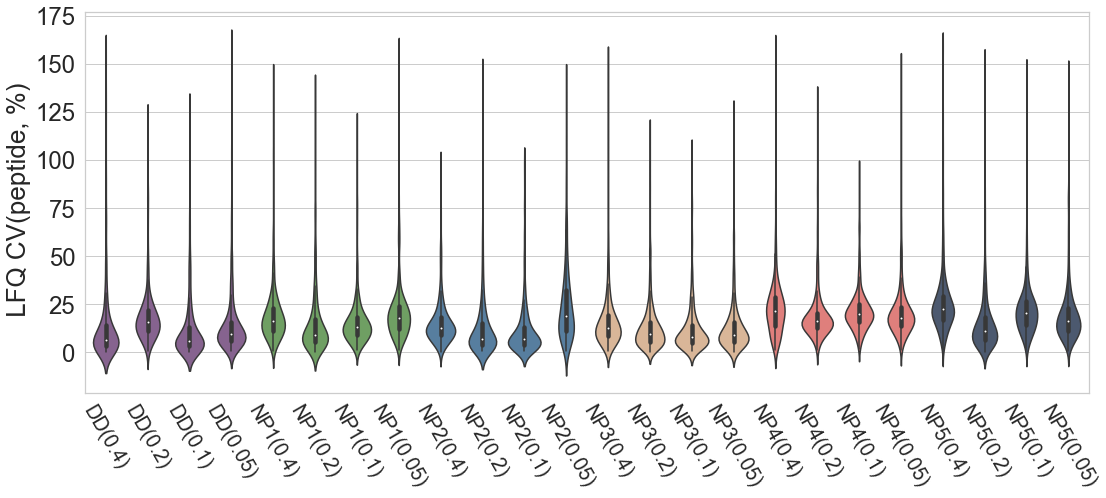

In [143]:
from matplotlib import rcParams
custom_palette = ['#8B5C96','#8B5C96','#8B5C96','#8B5C96',
                  '#69A959','#69A959','#69A959','#69A959',
                  '#4B7FAB','#4B7FAB','#4B7FAB','#4B7FAB',
                  '#E4B58D','#E4B58D','#E4B58D','#E4B58D',
                  '#ef6f6c','#ef6f6c','#ef6f6c','#ef6f6c',
                  '#465775','#465775','#465775','#465775']


# figure size in inches
plt.rcParams['figure.figsize']=(18,7)

sns.set(font_scale=2)
sns.set_style("whitegrid")
 
sns.violinplot(data=um,palette=custom_palette)
#sns.stripplot(data=um, jitter=True,alpha=0.6,size=4, color="black")
#plt.ylabel(' LFQ CV(protein, %)', fontsize=26)
plt.ylabel(' LFQ CV(peptide, %)', fontsize=26)

plt.xticks(fontsize=20,rotation=-60)
#plt.xticks([])
plt.yticks(fontsize=24)

plt.savefig('F:\\Seer_project\\figures\\CV_analysis\\LFQ_CV_pep.svg', dpi=800,bbox_inches='tight')
plt.show()


In [13]:
ter_np1=um['NP1'].tolist()
ter_np2=um['NP2'].tolist()
ter_np3=um['NP3'].tolist()
ter_np4=um['NP4'].tolist()
ter_np5=um['NP5'].tolist()
ter_dd=um['DD'].tolist()

In [14]:
data_sorted_np1 = np.sort(ter_np1)
data_sorted_np2 = np.sort(ter_np2)
data_sorted_np3 = np.sort(ter_np3)
data_sorted_np4 = np.sort(ter_np4)
data_sorted_np5 = np.sort(ter_np5)
data_sorted_dd = np.sort(ter_dd)

In [22]:
len(data_sorted_np1)

182

In [26]:
def remove_nan(tarlist):
    return(np.array([item for item in tarlist if not math.isnan(item)]))
    

In [28]:
cumulative_fraction_np1 = np.arange(1, len(remove_nan(data_sorted_np1)) + 1) / len(remove_nan(data_sorted_np1))
cumulative_fraction_np2 = np.arange(1, len(remove_nan(data_sorted_np2)) + 1) / len(remove_nan(data_sorted_np2))
cumulative_fraction_np3 = np.arange(1, len(remove_nan(data_sorted_np3)) + 1) / len(remove_nan(data_sorted_np3))
cumulative_fraction_np4 = np.arange(1, len(remove_nan(data_sorted_np4)) + 1) / len(remove_nan(data_sorted_np4))
cumulative_fraction_np5 = np.arange(1, len(remove_nan(data_sorted_np5)) + 1) / len(remove_nan(data_sorted_np5))
cumulative_fraction_dd  = np.arange(1, len(remove_nan(data_sorted_dd)) + 1) / len(remove_nan(data_sorted_dd))


In [32]:
cumulative_fraction_np4

array([0.00671141, 0.01342282, 0.02013423, 0.02684564, 0.03355705,
       0.04026846, 0.04697987, 0.05369128, 0.06040268, 0.06711409,
       0.0738255 , 0.08053691, 0.08724832, 0.09395973, 0.10067114,
       0.10738255, 0.11409396, 0.12080537, 0.12751678, 0.13422819,
       0.1409396 , 0.14765101, 0.15436242, 0.16107383, 0.16778523,
       0.17449664, 0.18120805, 0.18791946, 0.19463087, 0.20134228,
       0.20805369, 0.2147651 , 0.22147651, 0.22818792, 0.23489933,
       0.24161074, 0.24832215, 0.25503356, 0.26174497, 0.26845638,
       0.27516779, 0.28187919, 0.2885906 , 0.29530201, 0.30201342,
       0.30872483, 0.31543624, 0.32214765, 0.32885906, 0.33557047,
       0.34228188, 0.34899329, 0.3557047 , 0.36241611, 0.36912752,
       0.37583893, 0.38255034, 0.38926174, 0.39597315, 0.40268456,
       0.40939597, 0.41610738, 0.42281879, 0.4295302 , 0.43624161,
       0.44295302, 0.44966443, 0.45637584, 0.46308725, 0.46979866,
       0.47651007, 0.48322148, 0.48993289, 0.4966443 , 0.50335

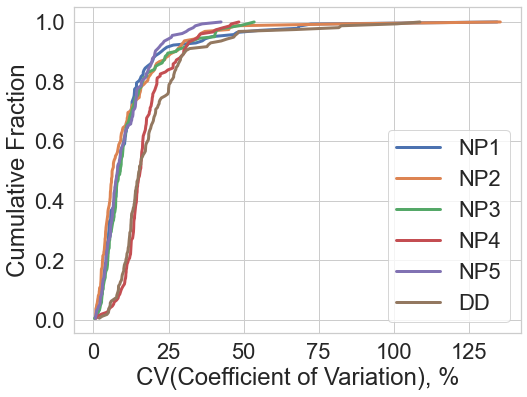

In [40]:
plt.rcParams['figure.figsize']=(8,6)
sns.set_style("whitegrid")


plt.plot(remove_nan(data_sorted_np1), cumulative_fraction_np1, linewidth=3,label="NP1")
plt.plot(remove_nan(data_sorted_np2), cumulative_fraction_np2, linewidth=3,label="NP2")
plt.plot(remove_nan(data_sorted_np3), cumulative_fraction_np3, linewidth=3,label="NP3")
plt.plot(remove_nan(data_sorted_np4), cumulative_fraction_np4, linewidth=3,label="NP4")
plt.plot(remove_nan(data_sorted_np5), cumulative_fraction_np5, linewidth=3,label="NP5")
plt.plot(remove_nan(data_sorted_dd), cumulative_fraction_dd, linewidth=3,label="DD")

plt.xlabel('CV(Coefficient of Variation), %')
plt.ylabel('Cumulative Fraction')
#plt.title('Cumulative Fraction Plot')
plt.grid(True)
plt.legend()
plt.savefig('E:\\project6_rapid profiling plasma peptides\\figures\\CV_pro_lineplot.svg', dpi=800,bbox_inches='tight')
plt.show()